# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import ipywidgets as widgets
from fuzzywuzzy import fuzz
%matplotlib inline
from ipywidgets import interactive

# 1. File Loading

## 1.1 Load csv 

In [3]:
tasteData = pd.read_csv('Varietal_taste.csv',encoding='latin-1')
tasteData.head()

,Varietal,Taste
0,Falanghina,"high_tannin, fruity"
1,Negroamaro,"high_tannin, low_acidity"
2,Montepulciano,chocolatey
3,Grillo,"dry, high_tannin, fruity"
4,Vermouth,"dry, high_tannin, light_body, herb"


## 1.2 Load Web Scraped and Web API’s Data

Web scraped data (including varietal, price, region, rating and other features) of all the wine products selling on Wine.com is used to create a wine catalog.

Web scraped data from Total Wine and Web API’s data from Amazon are used to compare the prices of same wine products in the wine catalog.

In [4]:
data=pd.read_csv("WineDotCom.csv",encoding='latin-1').iloc[:,1:]
data2=pd.read_csv("TotalWine.csv").iloc[:,1:]
data3=pd.read_csv("AmazonAPI.csv").iloc[:,1:]

## 1.3 Load Text File  

The introductions of different varietals are stored in the text files located in a subfolder called "Varietal". In this section, the program load all the text files and into a list so that the program can rapidly display the introduction of selected varietal.

In [5]:
#View description of varietal
all_files = os.listdir("Varietal/") #suppose you are one directory above test dir
print(all_files)
txt_files = filter(lambda x: x[-4:] == '.txt', all_files) #filter out all the text files 
print(txt_files)
varietal_files = list(txt_files)

['Pinot Blanc.txt', 'Gewurztraminer.txt', 'Carmenere.txt', 'Petit Verdot.txt', 'Tempranillo.txt', 'Pinot Gris:Grigio.txt', 'Junmai-Ginjo.txt', 'Cabernet Franc.txt', 'Chardonnay.txt', '.DS_Store', 'Verdejo.txt', 'Vermentino.txt', 'Vermouth.txt', 'Barbera.txt', 'Red Sparkling Wine.txt', 'Grenache Blanc.txt', 'Gruner Veltliner.txt', 'Torrontes.txt', 'Viognier.txt', 'Sherry.txt', 'Picpoul.txt', 'Gamay.txt', 'Port.txt', 'Albarino.txt', 'Furmint.txt', 'Tannat.txt', 'Zinfandel.txt', 'Bonarda.txt', 'Chenin Blanc.txt', 'Malvasia.txt', 'Malbec.txt', 'Aligote.txt', 'Garganega.txt', 'Merlot.txt', 'Muller Thurgau.txt', 'Muscat.txt', 'Syrah:Shiraz.txt', 'Mourvedre.txt', 'Touriga Nacional.txt', 'Dolcetto.txt', 'Nero d&apos;Avola.txt', 'Assyrtiko.txt', 'Sauvignon Blanc.txt', 'Rhone Red Blends.txt', 'Primitivo.txt', 'Roussanne.txt', 'Cinsault.txt', 'Greco.txt', 'Aglianico.txt', 'White Zinfandel.txt', 'Cortese.txt', 'Godello.txt', 'RosÌ©.txt', 'Grechetto.txt', 'Bordeaux Red Blends.txt', 'Lagrein.txt', '

In [6]:
os.chdir("Varietal/")
varietal_intro = {}
for f in varietal_files :
    with open(f, 'r') as file:
        varietal_intro[f] = file.read()

In [7]:
#Test if the text files are successfully loaded
print(varietal_intro['Aligote.txt'])

Aligote
Perfect ripeness balanced with a characteristic acidity make Aligoté a unique white grape in Burgundy. But since Chardonnay reigns supreme across the appellation, Aligoté almost always ends up unfairly lost in its shadowthough not always! In Côte Chalonnaise, in a quaint village named Bouzeron, just south of the Côte de Beaune, Aligoté has its very own appellation where yields are limited in order to enhance the grapes flavors and aromas. Some of the worlds very best come from there. And curiously, the famous producer, Domaine Ponsot, bottles a 100% Aligoté from its Premier Cru in Morey-Ste-Denis, Les Monts Luisants, made from Aligoté vines planted in 1911. Vignerons in the New World experiment with the grape but it is really most popular outside of Burgundy in the Eastern European countries of Romania, Burlgaria, Ukraine, and Moldova. What makes Aligoté unique is its intense citrus fruit flavors balanced by a floral character of honeysuckle blossom and a supple texture.


In [8]:
os.chdir("..") #move up one directory

# 2. Data Pre-processing

## 2.1 Data Cleaning and Preparation

Transform the title, year, price, rating and number of raters from Web scraped and Web API's data into desired format.

In [9]:
def clean_title(value):
    value = str(value).split(',')[0]
    return value
data3['Title'] = data3['Title'].apply(clean_title)

def clean_year(value):
    if pd.notnull(value):
        return int(value)
    return 0
data['Year'] = data['Year'].apply(clean_year)

def clean_price(value):
    value = str(value).replace(',', '').replace('$', '').strip()
    return float(value)
data2['Price'] = data2['Price'].apply(clean_price)
data3['Price'] = data3['Price'].apply(clean_price)

def clean_rating(value):
    value = str(value).replace('%', '').replace('width:', '').strip()
    return float(value)/100*5
data2['StarRating'] = data2['StarRating'].apply(clean_rating)

def clean_rater(value):
    if pd.isnull(value):
        return 0
    value = str(value).split('\t')[0][1:]
    return int(value)
data2['numRater'] = data2['numRater'].apply(clean_rater)

After data cleaning:

In [10]:
data.head()

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_JS,Score_TP,Score_D,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src
0,Caymus Napa Valley Cabernet Sauvignon 2016,2016,Cabernet Sauvignon,79.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.0,4.4,59,https://www.wine.com/product/Caymus-Napa-Valle...,https://www.wine.com/product/images/fl_progres...
1,Dom Perignon with Gift Box 2009,2009,Vintage Sparkling Wine,189.97,Champagne,France,96.0,NaN,NaN,NaN,...,97.0,NaN,96.0,NaN,NaN,96.0,4.2,110,https://www.wine.com/product/Dom-Perignon-with...,https://www.wine.com/product/images/fl_progres...
2,Ornellaia 2015,2015,Bordeaux Red Blends,219.99,Tuscany,Italy,97.0,NaN,NaN,NaN,...,98.0,NaN,NaN,98.0,NaN,98.0,3.5,5,https://www.wine.com/product/Ornellaia-2015/40...,https://www.wine.com/product/images/fl_progres...
3,Rombauer Chardonnay 2017,2017,Chardonnay,36.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,Grenache,79.99,Rhone,France,95.0,97.0,NaN,NaN,...,95.0,NaN,NaN,NaN,99.0,96.0,0.0,0,https://www.wine.com/product/Domaine-de-la-Jan...,https://www.wine.com/product/images/fl_progres...


In [11]:
data2.head()

,Title,Price,StarRating,numRater,Shopping_Link,Img_src
0,Cloud Break Chardonnay,8.99,4.3,110,https://www.totalwine.com/wine/white-wine/char...,https://image1.totalwine.com/media/sys_master/...
1,"Kendall Jackson Chardonnay, 2016",9.97,4.2,56,https://www.totalwine.com/wine/white-wine/char...,https://image1.totalwine.com/media/sys_master/...
2,Buttercream Chardonnay,13.99,3.6,69,https://www.totalwine.com/wine/new-arrivals/wh...,https://image1.totalwine.com/media/sys_master/...
3,Veuve Clicquot Brut NV,45.97,4.7,36,https://www.totalwine.com/wine/champagne-spark...,https://image1.totalwine.com/media/sys_master/...
4,La Vostra Prosecco,10.99,4.2,29,https://www.totalwine.com/wine/champagne-spark...,https://image1.totalwine.com/media/sys_master/...


In [12]:
data3.head()

,Title,Price,Shopping_Link
0,Ariel Cabernet Sauvignon Non-Alcoholic Red Win...,19.98,https://www.amazon.com/dp/B005MRMOAU
1,Dark Horse Cabernet Sauvignon,7.99,https://www.amazon.com/dp/B00AH5AOUE
2,Dark Horse Chardonnay,8.99,https://www.amazon.com/dp/B01EVBDL5E
3,St Regis Cabernet Sauvignon (non alcoholic wine),23.97,https://www.amazon.com/dp/B071NQ6BVC
4,Meiomi Pinot Noir Red Wine,23.99,https://www.amazon.com/dp/B00QVKYCQ6


## 2.2 Data Mapping

Same wine product may have slightly different names in different online stores, use fuzzywuzzy package to calculate the similarity of two strings, then match product titles in other online stores (Total Wine and Amazon) with the titles in wine catalog (Wine.com)
* Note: The following two cells may take few hours to execute. The output dataframe can be read directly from 'data_compare.csv'

In [13]:
data_match1=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data2['Title'].unique())
for index in data.index:
    if data.loc[index]['Year']==0:
        year=''
    else: year=str(int(data.loc[index]['Year']))
    for title in titles:
        if year in title:
            if (fuzz.token_sort_ratio(data.loc[index]['Title'], title)>=90) or (fuzz.token_set_ratio(data.loc[index]['Title'], title)>=95):
                data_match1=data_match1.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
                break

In [14]:
data_match2=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data3['Title'].unique())
for index in data.index:
    for title in titles:
        if fuzz.token_set_ratio(data.loc[index]['Title'], title)==100:
            data_match2=data_match2.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
            break

Merge product information in other online stores using 'Title', to create the data_compare dataframe, which stores price, rating, number of raters and shopping link of wine product in other online stores, and will be used in the compare_price function.

In [15]:
df1=pd.merge(data_match1,data2,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df1['Website']='Total Wine'
df2=pd.merge(data_match2,data3,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df2['Website']='Amazon'
data_compare=df1.append(df2,sort=False)
#data_compare.to_csv("data_compare.csv")
data_compare.head()

,Title,Title2,Price,StarRating,numRater,Shopping_Link,Img_src,Website
0,Caymus Napa Valley Cabernet Sauvignon 2016,"Caymus Cabernet, 2016",79.97,5.0,2.0,https://www.totalwine.com/wine/red-wine/cabern...,https://image1.totalwine.com/media/sys_master/...,Total Wine
1,Caymus Napa Valley Cabernet Sauvignon 2016,"Caymus Cabernet, 2016",99.97,4.9,14.0,https://www.totalwine.com/wine/red-wine/cabern...,https://image1.totalwine.com/media/sys_master/...,Total Wine
2,Ornellaia 2015,"Ornellaia, 2015",224.97,NaN,0.0,https://www.totalwine.com/wine/red-wine/bordea...,https://image1.totalwine.com/media/sys_master/...,Total Wine
3,Ornellaia 2015,"Ornellaia, 2015",449.99,NaN,0.0,https://www.totalwine.com/wine/red-wine/bordea...,https://image1.totalwine.com/media/sys_master/...,Total Wine
4,Ornellaia Le Serre Nuove 2015,"Ornellaia, 2015",224.97,NaN,0.0,https://www.totalwine.com/wine/red-wine/bordea...,https://image1.totalwine.com/media/sys_master/...,Total Wine


### You can skip above 3 blocks of code and start from here if you want to check below results first. The 'data_compare.csv' was obtained by running above data mapping code. We've saved the results into csv for convenience. 

In [ ]:
data_compare=pd.read_csv("data_compare.csv",encoding='latin-1').iloc[:,1:]

Update the wine catelog with three new columns - minimun price, average rating and total number of raters of each wine product caculated using data from all the online stores.

In [16]:
data['minPrice']=data['Price']
minPrice=data['minPrice'].copy()
for index in data.index:
    m=data_compare[data_compare['Title']==data.loc[index]['Title']]['Price'].min()
    if not pd.isnull(m):
        minPrice[index]=min(data.loc[index]['minPrice'],m)
data['minPrice']=minPrice

In [17]:
data['meanRating']=data['StarRating']
data['totalRater']=data['numRater']
meanRating=data['meanRating'].copy()
totalRater=data['totalRater'].copy()
for index in data.index:
    r=data_compare[data_compare['Title']==data.loc[index]['Title']]['StarRating'].mean()
    n=data_compare[data_compare['Title']==data.loc[index]['Title']]['numRater'].sum()
    if (not pd.isnull(r)) & (not pd.isnull(n)):
        totalRater[index]=data.loc[index]['numRater']+n
        meanRating[index]=(data.loc[index]['StarRating']*data.loc[index]['numRater']+r*n)/totalRater[index]
data['meanRating']=meanRating
data['totalRater']=totalRater

Merge taste data

In [18]:
data = pd.merge(data, tasteData, on = ['Varietal'], how='left')

The final wine catalog:

In [19]:
print(len(data))
data.head()

16325


,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater,Taste
0,Caymus Napa Valley Cabernet Sauvignon 2016,2016,Cabernet Sauvignon,79.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,92.0,4.4,59,https://www.wine.com/product/Caymus-Napa-Valle...,https://www.wine.com/product/images/fl_progres...,79.97,4.517333,75,"medium_acidity, low_tannin, full_body"
1,Dom Perignon with Gift Box 2009,2009,Vintage Sparkling Wine,189.97,Champagne,France,96.0,NaN,NaN,NaN,...,NaN,96.0,4.2,110,https://www.wine.com/product/Dom-Perignon-with...,https://www.wine.com/product/images/fl_progres...,189.97,4.200000,110,"sweet, fruity"
2,Ornellaia 2015,2015,Bordeaux Red Blends,219.99,Tuscany,Italy,97.0,NaN,NaN,NaN,...,NaN,98.0,3.5,5,https://www.wine.com/product/Ornellaia-2015/40...,https://www.wine.com/product/images/fl_progres...,219.99,3.500000,5,high_tannin
3,Rombauer Chardonnay 2017,2017,Chardonnay,36.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,36.99,4.900000,9,"off-dry, medium_acidity"
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,Grenache,79.99,Rhone,France,95.0,97.0,NaN,NaN,...,99.0,96.0,0.0,0,https://www.wine.com/product/Domaine-de-la-Jan...,https://www.wine.com/product/images/fl_progres...,79.99,0.000000,0,"low_acidity, low_tannin"


# 3. Statistical Analysis and Visualization

This section contains statistical analysis including visualization for customers who are seeking data analystics in wine industry. Some visualizations will be directly used in the company's website shown to users to give them a statistical overview.

## 3.1 Price Analysis

Show statistics and distribution of price:

In [20]:
print('mean price = $',data['minPrice'].mean())
print('highest price = $',data['minPrice'].max())
print('lowest price = $',data['minPrice'].min())

mean price = $ 60.44462297089439
highest price = $ 5499.97
lowest price = $ 2.19


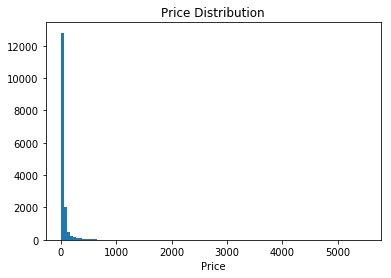

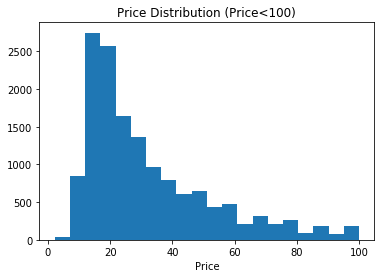

In [21]:
def PriceAnalysis():
    plt.hist(data['minPrice'],100)
    plt.xlabel('Price')
    plt.title('Price Distribution')
    plt.show()
    plt.hist(data[data['minPrice']<100]['minPrice'],20)
    plt.xlabel('Price')
    plt.title('Price Distribution (Price<100)')
    plt.show()
PriceAnalysis()

## 3.2 Varietal Analysis

Varietals with more than 200 wine products:

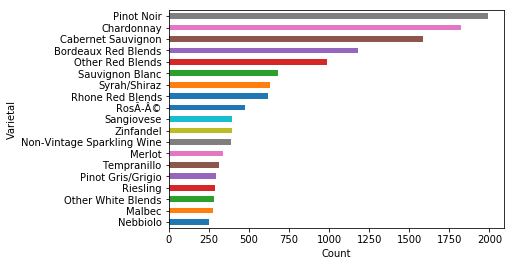

In [22]:
def varietalAnalysis():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=True)
    varietal[varietal>200].plot(kind="barh")
    plt.title('')
    plt.xlabel('Count')
varietalAnalysis()

Average price for varietals with more than 200 wine products:

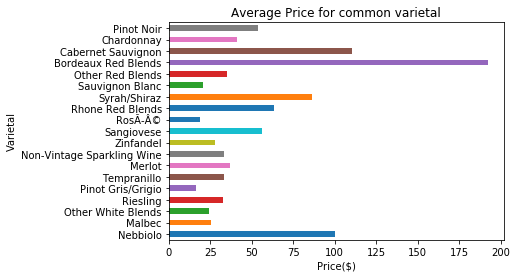

In [23]:
def varietal_price():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=True)
    df = data.groupby(['Varietal'])['minPrice'].agg(np.mean)
    varietal_price = pd.DataFrame(df)
    varietal_price
    df_new = pd.DataFrame(varietal[varietal>200])
    df_new.merge(varietal_price, left_index=True, right_index=True)['minPrice'].plot(kind="barh")
    plt.title('Average Price for common varietal')
    plt.xlabel('Price($)')
varietal_price()

Number of varietals in different regions:

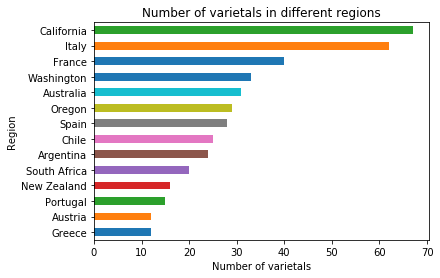

In [24]:
def varietal_region():
    varietal_country=data[['Country','Varietal']].drop_duplicates().groupby(['Country']).size().sort_values(ascending=True)
    varietal_country[varietal_country>10].plot(kind="barh")
    plt.title('Number of varietals in different regions')
    plt.xlabel('Number of varietals')
    plt.ylabel('Region')
varietal_region()

## 3.3 Region Analysis 

The plot shows the relationship between region, price and customers' ratings. Only 'StarRating' greater than zero is considered becuase zero means currently buyers have yet to give rating to the product.

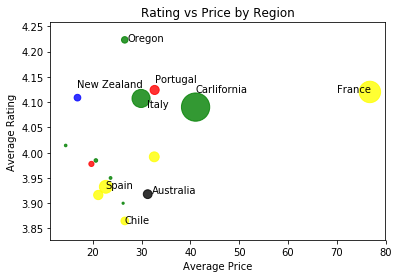

In [25]:
def regionAnalysis():
    wine = data[data["StarRating"]>0]
    count = pd.DataFrame(wine.groupby('Country').agg(['count'])['Title']).reset_index()
    avg_price = pd.DataFrame(wine.groupby('Country')['Price'].agg(['mean'])).reset_index()
    avg_star = pd.DataFrame(wine.groupby('Country')['StarRating'].agg(['mean'])).reset_index()
    count['avg_price'] = avg_price['mean']
    count['avg_star'] = avg_star['mean']
    count_revised =  count.loc[count['count'] >= 5].reset_index()
    col = ['yellow','black','green','yellow','yellow','green',
        'green','green','green','green','blue','green','red','red','yellow','yellow',
        'yellow','yellow','black','yellow','yellow','green','red','blue','green',
        'yellow','yellow']
    plt.title('Rating vs Price by Region')
    plt.xlabel('Average Price')
    plt.ylabel('Average Rating')
    plt.scatter(x = count_revised['avg_price'], y = count_revised['avg_star'], s = count_revised['count'], c = col, alpha = 0.8)
    plt.text(41, 4.12, 'Carlifornia')
    plt.text(70, 4.12, 'France')
    plt.text(31, 4.09, 'Italy' )
    plt.text(22.64, 3.93, 'Spain')
    plt.text(32, 3.92, 'Australia')
    plt.text(32.65,4.14, 'Portugal')
    plt.text(26.54, 3.86, 'Chile')
    plt.text(16.83, 4.13, 'New Zealand')
    plt.text(27, 4.22, 'Oregon')
regionAnalysis()

## 3.4 Year Analysis 

The plot shows the relationship between price and year using line plot.

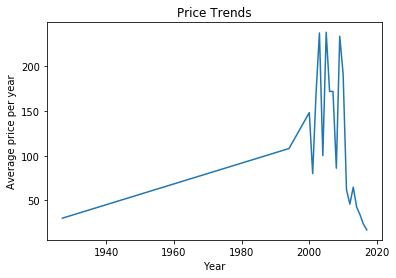

In [26]:
wine = data[(data['StarRating']>0)&(data['Year']>0)]
year_price = pd.DataFrame(wine.groupby('Year')['Price'].agg(['mean'])).reset_index()
year_price
plt.xlabel('Year')
plt.ylabel('Average price per year')
plt.title('Price Trends')
plt.plot(year_price['Year'], year_price['mean'])

## 3.5 Professional Rating Analysis 

The section below analyzes professional ratings given by wine magzines. It visualize the relationship between professional rating, region and price using cross tab and bar plot.

In [27]:
def drop_columns(df, column_names):
    df = df.drop(column_names, axis = 1)
    return df
def get_groupby_counts(df, groups):
    result = df.groupby(groups).count()
    return result

In [28]:
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["Professional Score"] > 0] 
#'Professional Score' is the mean score of all the professional rating. 
#Only items with positive score is considered because zero or null mean the item does not have professional score yet.

In [29]:
#Cross Tab for Region VS Professional Mean Score
professional_tab = pd.crosstab(df["Professional Score"], df['Country'], margins = True)
professional_tab

Country,Argentina,Australia,Austria,California,Chile,China,England,France,Germany,Greece,...,Other,Other U.S.,Portugal,Slovenia,South Africa,Spain,Uruguay,Virginia,Washington,All
Professional Score,,,,,,,,,,,,,,,,,,,,,
88.0,3,1,0,15,1,0,0,2,0,0,...,0,0,2,0,3,5,0,0,2,35
89.0,21,21,1,182,12,0,0,58,1,0,...,0,0,6,0,8,21,0,0,17,417
90.0,57,41,10,575,28,0,2,243,12,5,...,1,1,41,1,17,103,0,1,50,1427
91.0,53,52,11,533,39,0,4,332,14,6,...,0,1,35,0,11,81,3,0,49,1473
92.0,40,72,6,490,29,0,2,357,5,2,...,0,0,24,0,12,76,1,1,46,1390
93.0,27,45,2,357,9,1,1,272,4,0,...,0,0,22,1,3,51,0,0,26,991
94.0,9,30,1,210,6,0,0,207,2,0,...,0,0,12,0,3,19,0,0,23,620
95.0,7,20,2,148,0,0,0,148,3,0,...,0,0,10,0,1,8,0,0,12,424
96.0,5,6,2,98,2,0,0,138,0,0,...,0,0,7,0,0,4,0,0,10,286


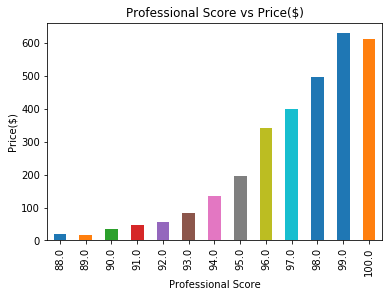

In [30]:
#Plot for Price vs Professional Mean Score
def professionalRating():
    professional_rating_price = data.groupby(['Professional Score']).Price.mean()
    professional_rating_price.plot.bar()
    plt.title('Professional Score vs Price($)')
    plt.ylabel('Price($)')
professionalRating()

## 3.5 Customer Rating Analysis 

This section shows the relationship between Customer rating (represented by 'StarRating' column in the dataset), year and price.

In [31]:
#Crosstab for Year vs Star Rating(customers' rating)
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
buyer_tab = pd.crosstab(df.StarRating, df.Year, margins = True)
buyer_tab
rating25 = pd.DataFrame(buyer_tab[3:4] + buyer_tab[0:1].values + buyer_tab[1:2].values + buyer_tab[2:3].values, columns = buyer_tab[0:1].columns)
rating25
rating30 = pd.DataFrame(buyer_tab[4:5].values + buyer_tab[5:6].values + buyer_tab[6:7].values + buyer_tab[7:8].values + buyer_tab[8:9], columns = buyer_tab[0:1].columns)
rating30
rating35 = pd.DataFrame(buyer_tab[9:10].values + buyer_tab[10:11].values + buyer_tab[11:12].values + buyer_tab[12:13].values + buyer_tab[13:14], columns = buyer_tab[0:1].columns)
rating35
rating40 = pd.DataFrame(buyer_tab[14:15].values + buyer_tab[15:16].values + buyer_tab[16:17].values + buyer_tab[17:18].values + buyer_tab[18:19], columns = buyer_tab[0:1].columns)
rating40
rating45 = pd.DataFrame(buyer_tab[19:20].values + buyer_tab[20:21].values + buyer_tab[21:22].values + buyer_tab[22:23].values + buyer_tab[23:24], columns = buyer_tab[0:1].columns)
rating45
rating50 = pd.DataFrame(buyer_tab[24:25].values + buyer_tab[25:26].values + buyer_tab[26:27].values + buyer_tab[27:28].values + buyer_tab[28:29], columns = buyer_tab[0:1].columns)
rating50
allogate_crosstab = rating25.append(rating30)
allogate_crosstab = allogate_crosstab.append(rating35)
allogate_crosstab = allogate_crosstab.append(rating40)
allogate_crosstab = allogate_crosstab.append(rating45)
allogate_crosstab = allogate_crosstab.append(rating50)
allogate_crosstab

Year,0,1927,1994,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
StarRating,,,,,,,,,,,,,,,,,,,,,
2.5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,6
3.0,6,0,0,0,0,0,0,0,1,0,...,1,3,0,2,2,5,5,4,0,29
3.5,31,0,0,0,0,0,0,0,0,1,...,2,2,6,7,23,26,51,41,7,197
4.0,147,0,0,1,1,1,0,0,1,0,...,3,4,13,34,63,168,202,167,30,839
4.5,196,1,0,2,0,0,1,1,6,4,...,13,11,21,35,80,158,192,190,58,972
5.0,61,0,1,1,0,3,1,0,3,4,...,4,6,5,7,25,52,46,39,20,282


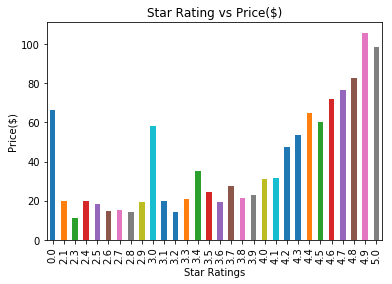

In [32]:
#Plot for star rating vs price
def buyerRating():
    star_rating_price = data.groupby(['StarRating']).Price.mean()
    star_rating_price.plot.bar()
    plt.title('Star Rating vs Price($)')
    plt.xlabel('Star Ratings')
    plt.ylabel('Price($)')
buyerRating()

## 3.6 Popularity Analysis 

Below shows the bar plot for TOP15 most popular wine selected basefd on number of raters who gave star ratings. 
We assume that sales is proportional to number of raters

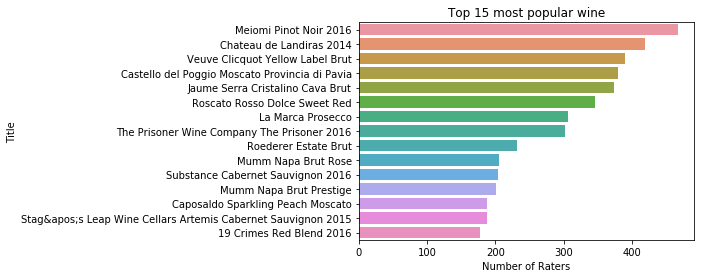

In [33]:
def popularityAnalysis():
    df = data.loc[:,['Title','numRater']]
    new_df = df.sort_values('numRater', ascending=False).head(15)
    sns.barplot(x='numRater', y='Title', data=new_df, orient='h')
    plt.title('Top 15 most popular wine')
    plt.xlabel('Number of Raters')
popularityAnalysis()

# 4. Overview for Users

This section aims to create a interactive UI. This section makes use of above plots to give users a statistical overview about the wines available for sale.

In [34]:
plot0 = interactive(popularityAnalysis)
plot1 = interactive(varietal_price)
plot2 = interactive(varietal_region)
plot3 = interactive(regionAnalysis)
plot4 = interactive(professionalRating)
plot5 = interactive(buyerRating)

In [35]:
children = [plot0,plot1, plot2, plot3, plot4,plot5]
tab = widgets.Tab()
tab.children = children
tab.set_title(0, 'Popular Wine')
tab.set_title(1, 'Varietal vs Price')
tab.set_title(2, 'Varietal vs Region')
tab.set_title(3, 'Region Overview')
tab.set_title(4, 'Professional Ratings Overview')
tab.set_title(5, 'Buyers Ratings Overview')
tab

# 5. Recommendation System

## --Recommend Products based on Users' prefernces

This section illustrates how the recommendation system of our website works. Users can search products by title, varietal, price range, year, region and taste. The program will give the closest matched results.

## 5.1 Search by Title 

Users can type in any products they want to search in the below search box. The program will search the whole product catalog and firstly give 100% matched results. Sometimes users might type in only part of a product title or different token sequence. The program can search all the products titles by token and calculate matching ratios. If the matching ratios are greater than 90, the program will return the products. All the returned products will be sorted in descending order based matching score and then displayed for users.

In this example, we search for 'Chateau Guiraud Sauternes'.

In [36]:
Search = widgets.Text(
    value= None,
    placeholder='Type something',
    description='Search:',
    disabled=False
)
Search

Text(value='', description='Search:', placeholder='Type something')

In [37]:
product_idx = {}
booleanVal_product=[None] * len(data)
#matching ratio score is calculated with the help of 'fuzzy wuzzy' package
for i in range(0, len(data)):
    ratio = fuzz.ratio(Search.value, data.iloc[i]['Title'])
    partial_ratio = fuzz.partial_ratio(Search.value, data.iloc[i]['Title'])
    token_ratio = fuzz.token_sort_ratio(Search.value,data.iloc[i]['Title'])
    if ratio == 100: 
        print(str(i) + ' ' +data.iloc[i]['Title'])
        product_idx[i] = ratio
        booleanVal_product[i] = True
    else:
        if partial_ratio >= 90:
            print(str(i) + ' ' +data.iloc[i]['Title'])
            product_idx[i] = partial_ratio
            booleanVal_product[i] = True
        elif token_ratio >= 90:
            print(str(i) + ' ' +data.iloc[i]['Title'])
            product_idx[i] = token_ratio
            booleanVal_product[i] = True
        else:
            booleanVal_product[i] = False

671 Chateau Guiraud Sauternes (375ML half-bottle) 2005
2295 Chateau Guiraud Sauternes 2010
3587 Chateau Guiraud Sauternes (375ML half-bottle) 2011
3758 Chateau Guiraud Sauternes 2011
4207 Chateau Guiraud Sauternes (375ML half-bottle) 2013
4422 Chateau Guiraud Sauternes (375ML half-bottle) 2010
4500 Chateau Guiraud Sauternes 2013
4829 Chateau Guiraud Sauternes 2015
5411 Chateau Guiraud Sauternes (375ML half-bottle) 2014
5571 Chateau Guiraud Sauternes (375ML half-bottle) 2015
13512 Chateau Guiraud Sauternes 2014
15094 Chateau Guiraud Sauternes (Futures Pre-Sale) 2017
15656 Chateau Guiraud Sauternes (Futures Pre-Sale) 2016
15938 Chateau Guiraud Sauternes (375ML Futures Pre-Sale) 2017
15975 Chateau Guiraud Sauternes (375ML Futures Pre-Sale) 2016


In [38]:
df = data
df = df.loc[booleanVal_product,:]
df_product = pd.DataFrame(product_idx, index=['score']).T.sort_values(by='score',ascending=False)

In [39]:
index = list(df_product.index)
df_display = data.loc[index][['Title','Year','minPrice','Varietal','Country','Professional Score','StarRating','Shopping_Link']].rename(columns={'Country':'Country/Region'})
df_display

,Title,Year,minPrice,Varietal,Country/Region,Professional Score,StarRating,Shopping_Link
671,Chateau Guiraud Sauternes (375ML half-bottle) ...,2005,31.99,Other Dessert,France,95.0,4.7,https://www.wine.com/product/Chateau-Guiraud-S...
2295,Chateau Guiraud Sauternes 2010,2010,49.99,Other Dessert,France,94.0,4.5,https://www.wine.com/product/Chateau-Guiraud-S...
3587,Chateau Guiraud Sauternes (375ML half-bottle) ...,2011,39.99,Other Dessert,France,96.0,4.2,https://www.wine.com/product/Chateau-Guiraud-S...
3758,Chateau Guiraud Sauternes 2011,2011,49.99,Other Dessert,France,96.0,4.3,https://www.wine.com/product/Chateau-Guiraud-S...
4207,Chateau Guiraud Sauternes (375ML half-bottle) ...,2013,24.99,Other Dessert,France,94.0,4.2,https://www.wine.com/product/Chateau-Guiraud-S...
4422,Chateau Guiraud Sauternes (375ML half-bottle) ...,2010,29.99,Other Dessert,France,94.0,4.3,https://www.wine.com/product/Chateau-Guiraud-S...
4500,Chateau Guiraud Sauternes 2013,2013,29.98,Other Dessert,France,94.0,0.0,https://www.wine.com/product/Chateau-Guiraud-S...
4829,Chateau Guiraud Sauternes 2015,2015,29.99,Other Dessert,France,94.0,0.0,https://www.wine.com/product/Chateau-Guiraud-S...
5411,Chateau Guiraud Sauternes (375ML half-bottle) ...,2014,27.99,Other Dessert,France,95.0,4.2,https://www.wine.com/product/Chateau-Guiraud-S...
5571,Chateau Guiraud Sauternes (375ML half-bottle) ...,2015,26.99,Other Dessert,France,95.0,0.0,https://www.wine.com/product/Chateau-Guiraud-S...


## 5.2 Search by Varietal 

Users can select varietal from the drop down list below. The program can display the introduction of the selected varietal and give recommendations on products of the varietal.

In this example, we select ‘Grenache’.

In [40]:
selectVarietal = widgets.Dropdown(
    options=list(tasteData.iloc[:,0].unique()),
    value = None,
    description='Varietal:'
)
selectVarietal

Dropdown(description='Varietal:', options=('Falanghina', 'Negroamaro', 'Montepulciano', 'Grillo', 'Vermouth', …

In [41]:
#Display Introduction
try:
    #varietal_intro[varietal_filename]
    varietal_filename = selectVarietal.value+".txt"
    print(varietal_intro[varietal_filename])
except:
    print("No Results Matched")


Grenache
The red Grenache grape is one of the world’s most widely planted varieties. If you don’t hear its name that often, it’s because Grenache is frequently a team player in red blended wines.

Grenache is typically the dominant grape in red blends with Syrah, Mourvèdre and Cinsault made in France’s southern Rhône region, producing wines as storied as Châteauneuf-du-Pape and accessible as Côtes-du-Rhône. Grenache thrives in warm climates, so it is increasingly popular in the South of France, where it makes red and rosé varietal wines as well as Grenache-Syrah-Mourvèdre blends, dubbed “GSM” wines.

Grenache wines have relatively low acidity, low tannins and high alcohol, so they don’t require lengthy aging. Their flavors include red and black fruits, spice and earth.
In Spain, where it’s thought to have originated, this grape variety is known as Garnacha. Here, it makes spicy, fruit-filled red and refreshing rosé wines and is often blended with Tempranillo. It’s also the primary grap

In [42]:
df = data
#use a boolean variable with the same length of data to mark which row meets the selection.
if selectVarietal.value: 
    boolVal_varietal = (df['Varietal'] == selectVarietal.value)
    df.loc[boolVal_varietal,:]
else:
    boolVal_varietal = (df['Varietal'] != 0)
    print("No result matched")
df.loc[boolVal_varietal,['Title','Year','minPrice','Varietal','Country','Professional Score','StarRating','Shopping_Link']].rename(columns={'Country':'Country/Region'})

,Title,Year,minPrice,Varietal,Country/Region,Professional Score,StarRating,Shopping_Link
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,79.99,Grenache,France,96.0,0.0,https://www.wine.com/product/Domaine-de-la-Jan...
207,Chateau de Vaudieu Amiral G Chateauneuf-du-Pap...,2016,109.00,Grenache,France,97.0,0.0,https://www.wine.com/product/Chateau-de-Vaudie...
365,Alto Moncayo Veraton 2015,2015,26.99,Grenache,Spain,92.0,4.7,https://www.wine.com/product/Alto-Moncayo-Vera...
793,Domaine des Bosquets Gigondas La Colline 2016,2016,65.99,Grenache,France,96.0,0.0,https://www.wine.com/product/Domaine-des-Bosqu...
1073,Evodia Old Vine Grenache 2016,2016,9.99,Grenache,Spain,NaN,3.9,https://www.wine.com/product/Evodia-Old-Vine-G...
1387,Clarendon Hills Romas Grenache 2010,2010,53.99,Grenache,Australia,93.0,0.0,https://www.wine.com/product/Clarendon-Hills-R...
1558,Sine Qua Non The Duel Grenache 2008,2008,429.97,Grenache,California,95.0,0.0,https://www.wine.com/product/Sine-Qua-Non-The-...
1642,Domaine Lafage Cuvee Nicolas 2014,2014,13.99,Grenache,France,92.0,3.8,https://www.wine.com/product/Domaine-Lafage-Cu...
1694,Sine Qua Non Raven Series Grenache 2006,2006,399.97,Grenache,California,97.0,0.0,https://www.wine.com/product/Sine-Qua-Non-Rave...
1955,Yalumba Old Bush Vine Grenache 2016,2016,18.99,Grenache,Australia,91.0,4.0,https://www.wine.com/product/Yalumba-Old-Bush-...


## 5.3 Search by Price Range 

Users can see the products within their desired price range by adjusting the slider below.

In this example, we set the range to [0, 88.5].

In [43]:
selectPrice = widgets.FloatRangeSlider(
    value=None,
    min=0,
    max=5500.0,
    step=0.1,
    description='Price Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
selectPrice

FloatRangeSlider(value=(1375.0, 4125.0), continuous_update=False, description='Price Range:', max=5500.0)

In [44]:
selectPrice.value
minPrice = selectPrice.value[0]
maxPrice = selectPrice.value[1]
df = data

boolVal_price = (df['minPrice']>=minPrice) & (df['minPrice']<=maxPrice)
if not any(boolVal_price): 
    print('No results matched')
else: 
    df.loc[boolVal_price,:]
#show all the products between the price range
df.loc[boolVal_price,['Title','Year','minPrice','Varietal','Country','Professional Score','StarRating','Taste','Shopping_Link']].rename(columns={'Country':'Country/Region'})

,Title,Year,minPrice,Varietal,Country/Region,Professional Score,StarRating,Taste,Shopping_Link
0,Caymus Napa Valley Cabernet Sauvignon 2016,2016,79.97,Cabernet Sauvignon,California,92.0,4.4,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Caymus-Napa-Valle...
3,Rombauer Chardonnay 2017,2017,36.99,Chardonnay,California,91.0,4.9,"off-dry, medium_acidity",https://www.wine.com/product/Rombauer-Chardonn...
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,79.99,Grenache,France,96.0,0.0,"low_acidity, low_tannin",https://www.wine.com/product/Domaine-de-la-Jan...
7,Tour Saint Christophe Les Terrasses de Saint C...,2014,21.99,Bordeaux Red Blends,France,92.0,3.9,high_tannin,https://www.wine.com/product/Tour-Saint-Christ...
9,Duckhorn Napa Valley Cabernet Sauvignon 2015,2015,54.99,Cabernet Sauvignon,California,91.0,4.4,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Duckhorn-Napa-Val...
12,Scattered Peaks Cabernet Sauvignon 2015,2015,34.99,Cabernet Sauvignon,California,94.0,4.0,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Scattered-Peaks-C...
13,Silver Oak Alexander Valley Cabernet Sauvignon...,2014,74.99,Cabernet Sauvignon,California,93.0,4.1,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Silver-Oak-Alexan...
14,Chappellet Signature Cabernet Sauvignon 2015,2015,54.99,Cabernet Sauvignon,California,94.0,4.2,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Chappellet-Signat...
15,Veuve Clicquot Yellow Label Brut,0,59.97,Non-Vintage Sparkling Wine,France,91.0,4.4,"dry, fruity",https://www.wine.com/product/Veuve-Clicquot-Ye...
16,La Rioja Alta Gran Reserva 904 Tinto 2009,2009,64.99,Tempranillo,Spain,96.0,4.3,"medium_acidity, medium_tannin, fruity",https://www.wine.com/product/La-Rioja-Alta-Gra...


## 5.4 Search by Region 

Users can select region from the drop down list to see all the products from the region.

In this example, we select 'France'.

In [45]:
selectRegion = widgets.Dropdown(
    options= list(data['Country'].unique()),
    value = None,
    description='Region:'
)
selectRegion

Dropdown(description='Region:', options=('California', 'France', 'Italy', 'Spain', 'Washington', 'Other', 'Por…

In [46]:
#Use a boolean variable with same length as data to mark which row meets the requirements.
if selectRegion.value:
    boolVal_region = (df['Country'] == selectRegion.value)
    df.loc[boolVal_region,:]
else:
    boolVal_region = (df['Country'] != 0)
    print("No results matched")

df.loc[boolVal_region,['Title','Year','minPrice','Varietal','Country','Professional Score','StarRating','Taste','Shopping_Link']].rename(columns={'Country':'Country/Region'})

,Title,Year,minPrice,Varietal,Country/Region,Professional Score,StarRating,Taste,Shopping_Link
1,Dom Perignon with Gift Box 2009,2009,189.97,Vintage Sparkling Wine,France,96.0,4.2,"sweet, fruity",https://www.wine.com/product/Dom-Perignon-with...
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,79.99,Grenache,France,96.0,0.0,"low_acidity, low_tannin",https://www.wine.com/product/Domaine-de-la-Jan...
7,Tour Saint Christophe Les Terrasses de Saint C...,2014,21.99,Bordeaux Red Blends,France,92.0,3.9,high_tannin,https://www.wine.com/product/Tour-Saint-Christ...
15,Veuve Clicquot Yellow Label Brut,0,59.97,Non-Vintage Sparkling Wine,France,91.0,4.4,"dry, fruity",https://www.wine.com/product/Veuve-Clicquot-Ye...
31,Louis Roederer Cristal Brut 2008,2008,259.97,Vintage Sparkling Wine,France,99.0,0.0,"sweet, fruity",https://www.wine.com/product/Louis-Roederer-Cr...
35,Veuve Clicquot Vintage Brut 2008,2008,89.99,Vintage Sparkling Wine,France,93.0,4.4,"sweet, fruity",https://www.wine.com/product/Veuve-Clicquot-Vi...
38,Laurent-Perrier Brut Rose,0,69.97,RosÃ­Â© Sparkling Wine,France,93.0,4.6,NaN,https://www.wine.com/product/Laurent-Perrier-B...
40,Chateau Sansonnet 2015,2015,39.99,Bordeaux Red Blends,France,93.0,0.0,high_tannin,https://www.wine.com/product/Chateau-Sansonnet...
42,Domaine du Vieux Telegraphe Chateauneuf-du-Pap...,2016,85.00,Rhone Red Blends,France,96.0,0.0,low_acidity,https://www.wine.com/product/Domaine-du-Vieux-...
45,Chateau Clos du Roy 2015,2015,15.99,Bordeaux Red Blends,France,92.0,3.8,high_tannin,https://www.wine.com/product/Chateau-Clos-du-R...


## 5.5 Search by Year 

Users can select range of production year to see producs using below slider.

In this example, we set the range to [2000, 2018].

In [47]:
selectYear = widgets.IntRangeSlider(
    value=[1927, 2018],
    min=1927,
    max=2018,
    step=1,
    description='Year Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
selectYear

IntRangeSlider(value=(1927, 2018), continuous_update=False, description='Year Range:', max=2018, min=1927)

In [48]:
df = data
minYear = selectYear.value[0]
maxYear = selectYear.value[1]
boolVal_yr = (df['Year'] >= minYear) & (df['Year'] <= maxYear)
if not any(boolVal_yr): 
    print('No results matched')

df.loc[boolVal_yr,['Title','Year','minPrice','Varietal','Country','Professional Score','StarRating','Taste','Shopping_Link']].rename(columns={'Country':'Country/Region'})

,Title,Year,minPrice,Varietal,Country/Region,Professional Score,StarRating,Taste,Shopping_Link
0,Caymus Napa Valley Cabernet Sauvignon 2016,2016,79.97,Cabernet Sauvignon,California,92.0,4.4,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Caymus-Napa-Valle...
1,Dom Perignon with Gift Box 2009,2009,189.97,Vintage Sparkling Wine,France,96.0,4.2,"sweet, fruity",https://www.wine.com/product/Dom-Perignon-with...
2,Ornellaia 2015,2015,219.99,Bordeaux Red Blends,Italy,98.0,3.5,high_tannin,https://www.wine.com/product/Ornellaia-2015/40...
3,Rombauer Chardonnay 2017,2017,36.99,Chardonnay,California,91.0,4.9,"off-dry, medium_acidity",https://www.wine.com/product/Rombauer-Chardonn...
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,79.99,Grenache,France,96.0,0.0,"low_acidity, low_tannin",https://www.wine.com/product/Domaine-de-la-Jan...
5,Silver Oak Napa Valley Cabernet Sauvignon 2013,2013,114.99,Cabernet Sauvignon,California,94.0,4.5,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Silver-Oak-Napa-V...
7,Tour Saint Christophe Les Terrasses de Saint C...,2014,21.99,Bordeaux Red Blends,France,92.0,3.9,high_tannin,https://www.wine.com/product/Tour-Saint-Christ...
8,Tua Rita Redigaffi Toscana 2015,2015,299.99,Merlot,Italy,98.0,0.0,"medium_acidity, full_body",https://www.wine.com/product/Tua-Rita-Redigaff...
9,Duckhorn Napa Valley Cabernet Sauvignon 2015,2015,54.99,Cabernet Sauvignon,California,91.0,4.4,"medium_acidity, low_tannin, full_body",https://www.wine.com/product/Duckhorn-Napa-Val...
10,Joseph Phelps Insignia 2014 6 Pack OWC,2014,249.99,Mixed Collections,California,96.0,0.0,other,https://www.wine.com/product/Joseph-Phelps-Ins...


## 5.6 Search by Taste 

Users can select mutiple tastes, all the products with selected tastes will be showed. Taste is greatly associated with varietal. We summarize taste for each varietal and integrate the taste with the data of all available products. Since many users do not have sufficient knowledge about wine, they can select taste to choose wine by using our website/app.

In this example, we select 'low_acidity' and 'low_tannin'.

In [49]:
#Creat a list object for taste.
Tastes=['all']
for taste in list(tasteData.iloc[:,1].unique()):
    for s in taste.split(','):
        Tastes.append(s.strip())
Tastes=list(set(Tastes))
Tastes.sort()
Tastes[0]

'all'

In [50]:
selectTaste = widgets.SelectMultiple(
    options= Tastes,
    value=['all'],
    rows=10,
    description='Taste:',
    disabled=False
)
selectTaste

SelectMultiple(description='Taste:', index=(0,), options=('all', 'almond', 'berry', 'blossom', 'chocolatey', '…

In [51]:
#user data 
boolVal_taste = pd.notnull(data['Title'])
if 'all' not in selectTaste.value:
    for index in data.index:
        t=data.loc[index]['Taste']
        if pd.isnull(t):
            boolVal_taste[index]=False
        else:
            b=True
            for taste in selectTaste.value:
                b=b&(taste in t)
            if not b:
                b=True
                for taste in t.split(','):
                    b=b&(taste.strip() in selectTaste.value)
                    boolVal_taste[index]=b
    if not boolVal_taste.any():
        print("No results matched")

data.loc[boolVal_taste,['Title','Year','minPrice','Varietal','Country','Professional Score','StarRating','Taste','Shopping_Link']].rename(columns={'Country':'Country/Region'})

,Title,Year,minPrice,Varietal,Country/Region,Professional Score,StarRating,Taste,Shopping_Link
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,79.99,Grenache,France,96.0,0.0,"low_acidity, low_tannin",https://www.wine.com/product/Domaine-de-la-Jan...
37,Domaine Serene Evenstad Reserve Pinot Noir 2014,2014,64.99,Pinot Noir,Oregon,94.0,4.5,"low_acidity, low_tannin",https://www.wine.com/product/Domaine-Serene-Ev...
42,Domaine du Vieux Telegraphe Chateauneuf-du-Pap...,2016,85.00,Rhone Red Blends,France,96.0,0.0,low_acidity,https://www.wine.com/product/Domaine-du-Vieux-...
59,Goldeneye Anderson Valley Pinot Noir 2015,2015,44.95,Pinot Noir,California,91.0,4.3,"low_acidity, low_tannin",https://www.wine.com/product/Goldeneye-Anderso...
66,Domaine du Pegau Chateauneuf-du-Pape Cuvee Lau...,2012,99.99,Rhone Red Blends,France,96.0,0.0,low_acidity,https://www.wine.com/product/Domaine-du-Pegau-...
72,Schug Sonoma Coast Pinot Noir 2016,2016,19.99,Pinot Noir,California,90.0,4.2,"low_acidity, low_tannin",https://www.wine.com/product/Schug-Sonoma-Coas...
73,Martin Ray Sonoma County Pinot Noir 2016,2016,18.99,Pinot Noir,California,94.0,4.0,"low_acidity, low_tannin",https://www.wine.com/product/Martin-Ray-Sonoma...
75,El Enemigo Gran Enemigo Gualtallary Single Vin...,2013,124.99,Cabernet Franc,Argentina,97.0,0.0,low_tannin,https://www.wine.com/product/El-Enemigo-Gran-E...
91,Delas Cotes du Rhone St. Esprit Rouge 2016,2016,11.99,Rhone Red Blends,France,95.0,3.7,low_acidity,https://www.wine.com/product/Delas-Cotes-du-Rh...
98,Flowers Sonoma Coast Pinot Noir 2016,2016,44.99,Pinot Noir,California,91.0,4.1,"low_acidity, low_tannin",https://www.wine.com/product/Flowers-Sonoma-Co...


## 5.7 Search by Varietal, Year, Taste and Region

This section gives search results considering varietal, price, year, taste and region together.

In [52]:
boolVal_yr
boolVal_price
boolVal_varietal
boolVal_region
boolVal_taste

boolVal = []
for i in range(0, len(data)):
    boolVal.append(all([boolVal_yr[i], boolVal_price[i],boolVal_varietal[i],boolVal_region[i],boolVal_taste[i]]))
df = data 
boolVal
if len(data.loc[boolVal,:])==0: print("No Results Matched")

data.loc[boolVal,['Title','Year','Varietal','Taste','minPrice','Professional Score','StarRating','Shopping_Link']]

,Title,Year,Varietal,Taste,minPrice,Professional Score,StarRating,Shopping_Link
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016,Grenache,"low_acidity, low_tannin",79.99,96.0,0.0,https://www.wine.com/product/Domaine-de-la-Jan...
793,Domaine des Bosquets Gigondas La Colline 2016,2016,Grenache,"low_acidity, low_tannin",65.99,96.0,0.0,https://www.wine.com/product/Domaine-des-Bosqu...
1642,Domaine Lafage Cuvee Nicolas 2014,2014,Grenache,"low_acidity, low_tannin",13.99,92.0,3.8,https://www.wine.com/product/Domaine-Lafage-Cu...
2969,Department 66 Grenache 2014,2014,Grenache,"low_acidity, low_tannin",37.99,93.0,3.8,https://www.wine.com/product/Department-66-Gre...
5166,Tetu Grenache 2015,2015,Grenache,"low_acidity, low_tannin",27.99,91.0,0.0,https://www.wine.com/product/Tetu-Grenache-201...
6561,Andre Brunel Grenache 2014,2014,Grenache,"low_acidity, low_tannin",12.99,NaN,0.0,https://www.wine.com/product/Andre-Brunel-Gren...
9381,Domaine de Mourchon Cotes du Rhone Villages Se...,2014,Grenache,"low_acidity, low_tannin",39.99,91.0,0.0,https://www.wine.com/product/Domaine-de-Mourch...
10036,Domaine de Cristia Grenache Vieilles Vignes 2014,2014,Grenache,"low_acidity, low_tannin",13.99,NaN,0.0,https://www.wine.com/product/Domaine-de-Cristi...
11278,Gilles Troullier L&apos;Esprit du Temps 2013,2013,Grenache,"low_acidity, low_tannin",31.99,NaN,0.0,https://www.wine.com/product/Gilles-Troullier-...
12760,Chateau de Campuget 1753 Grenache 2015,2015,Grenache,"low_acidity, low_tannin",17.99,NaN,0.0,https://www.wine.com/product/Chateau-de-Campug...


## 5.8 Compare Prices 

Given the product title in the wine catalog, search in the data_compare dataframe, show all available prices in different online stores. This function can be used when a user gets the search results and desides to buy a product. 

We use 'Ruffino Prosecco' as an example.

In [53]:
def compare_price(search_title):
    i=data[data['Title']==search_title].index[0]
    price_list=data[data['Title']==search_title][['Title','Price','Shopping_Link']]
    price_list['Website']='Wine.com'
    price_list2=data_compare[data_compare['Title']==search_title][['Website','Title2','Price','Shopping_Link']].rename(columns={'Title2':'Title'})
    price_list=price_list2.append(price_list,sort=False).sort_values('Price')
    print('The lowest price of '+search_title+' is $',price_list.iloc[0]['Price'],'on',price_list.iloc[0]['Website'])
    return price_list[['Website','Title','Price','Shopping_Link']]

compare_price('Ruffino Prosecco')

The lowest price of Ruffino Prosecco is $ 9.47 on Total Wine


,Website,Title,Price,Shopping_Link
560,Total Wine,Ruffino Prosecco,9.47,https://www.totalwine.com/wine/champagne-spark...
561,Total Wine,Ruffino Prosecco,10.99,https://www.totalwine.com/wine/champagne-spark...
1284,Wine.com,Ruffino Prosecco,11.99,https://www.wine.com/product/Ruffino-Prosecco/...
1663,Amazon,Ruffino Prosecco DOC Sparkling White Wine,12.99,https://www.amazon.com/dp/B005J0PWG8


# 6. Recommend Similar Items

Given a product in the wine catalog, calculate the similarity score based on different dimensions - title, year, price, varietal, taste and region, show the top 20 products with the highest score. This function can be used when the user is viewing one product. 

We use the first item of the search results as an example.

In [54]:
def find_similar_items(search_title):
    i=data[data['Title']==search_title].index[0]
    similar_list=pd.DataFrame(columns=['Title','Score'])
    for index in data.index:
        if index!=i:
            score=0
            r1=fuzz.token_sort_ratio(data.loc[index]['Title'], search_title)
            r2=fuzz.token_set_ratio(data.loc[index]['Title'], search_title)                        
            if max(r1,r2)>=80:
                score+=max(r1,r2)
            score+=max(0,10-abs(data.loc[index]['Year']-data.loc[i]['Year']))*3
            score+=min(data.loc[index]['Price'],data.loc[i]['Price'])/max(data.loc[index]['Price'],data.loc[i]['Price'])*30
            if data.loc[index]['Varietal']==data.loc[i]['Year']:
                score+=50
            else:
                r1=fuzz.token_sort_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
                r2=fuzz.token_set_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
                score+=max(r1,r2)/2
            if data.loc[index]['Country']==data.loc[i]['Country']:
                score+=40   
            if data.loc[index]['Region']==data.loc[i]['Region']:
                score+=30  
            similar_list=similar_list.append({'Title': data.loc[index]['Title'],'Score': score},ignore_index=True)
    similar_items=similar_list.sort_values(by='Score',ascending=False).iloc[:20,:1].merge(data,on='Title')
    print("Wines similar to "+search_title+" :")
    return similar_items[['Title','Year','Varietal','Taste','minPrice','Professional Score','StarRating','Shopping_Link']]

find_similar_items(data.loc[boolVal,'Title'].iloc[0])

Wines similar to Domaine de la Janasse Chateauneuf-du-Pape Cuvee Chaupin 2016 :


,Title,Year,Varietal,Taste,minPrice,Professional Score,StarRating,Shopping_Link
0,Domaine de la Janasse Chateauneuf-du-Pape 2016,2016,Rhone Red Blends,low_acidity,54.99,93.0,0.0,https://www.wine.com/product/Domaine-de-la-Jan...
1,Domaine de Marcoux Chateauneuf-du-Pape 2016,2016,Rhone Red Blends,low_acidity,61.99,94.0,0.0,https://www.wine.com/product/Domaine-de-Marcou...
2,Domaine de la Janasse Chateauneuf-du-Pape 2015,2015,Rhone Red Blends,low_acidity,49.99,92.0,4.4,https://www.wine.com/product/Domaine-de-la-Jan...
3,Domaine de la Janasse Chateauneuf-du-Pape (1.5...,2016,Rhone Red Blends,low_acidity,109.00,NaN,0.0,https://www.wine.com/product/Domaine-de-la-Jan...
4,Domaine de Cristia Cuvee Renaissance Chateaune...,2015,Rhone Red Blends,low_acidity,69.99,95.0,0.0,https://www.wine.com/product/Domaine-de-Cristi...
5,Domaine Brunely Chateauneuf-du-Pape 2016,2016,Rhone Red Blends,low_acidity,39.99,NaN,0.0,https://www.wine.com/product/Domaine-Brunely-C...
6,Domaine de la Janasse Chateauneuf-du-Pape 2011,2011,Rhone Red Blends,low_acidity,54.99,91.0,0.0,https://www.wine.com/product/Domaine-de-la-Jan...
7,Domaine de Marcoux Chateauneuf-du-Pape 2013,2013,Rhone Red Blends,low_acidity,69.99,90.0,0.0,https://www.wine.com/product/Domaine-de-Marcou...
8,Domaine de Marcoux Chateauneuf-du-Pape 2015,2015,Rhone Red Blends,low_acidity,49.99,93.0,0.0,https://www.wine.com/product/Domaine-de-Marcou...
9,Domaine de Cristia Chateauneuf-du-Pape 2015,2015,Rhone Red Blends,low_acidity,41.99,93.0,4.2,https://www.wine.com/product/Domaine-de-Cristi...
